In [ ]:
!pip install nfstream
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.0/195.0 kB 14.3 MB/s eta 0:00:00


In [ ]:
!pip install numpy
!pip install pyyaml
!pip install scikit-learn

In [ ]:
!pip install scapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.1 MB/s eta 0:00:00


In [ ]:
import nfstream
from nfstream import NFStreamer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yaml


In [ ]:
mal_stream = NFStreamer(source="malicious_traffic_lab2.pcap", statistical_analysis= True)
mal_stream.to_pandas().head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type
0,0,0,fe80::45f6:82cd:198c:6a1a,08:00:27:82:af:1f,08:00:27,546,ff02::1:2,33:33:00:01:00:02,33:33:00,547,...,0,DHCPV6,Network,0,6,NaN,NaN,NaN,NaN,NaN
1,1,0,::,08:00:27:82:af:1f,08:00:27,0,ff02::1:ff8c:6a1a,33:33:ff:8c:6a:1a,33:33:ff,0,...,0,ICMPV6,Network,0,6,NaN,NaN,NaN,NaN,NaN
2,2,0,fe80::45f6:82cd:198c:6a1a,08:00:27:82:af:1f,08:00:27,0,ff02::2,33:33:00:00:00:02,33:33:00,0,...,0,ICMPV6,Network,0,6,NaN,NaN,NaN,NaN,NaN
3,3,0,fe80::45f6:82cd:198c:6a1a,08:00:27:82:af:1f,08:00:27,0,ff02::16,33:33:00:00:00:16,33:33:00,0,...,0,ICMPV6,Network,0,6,NaN,NaN,NaN,NaN,NaN
4,4,0,10.0.2.119,08:00:27:82:af:1f,08:00:27,62971,8.8.8.8,52:54:00:12:35:02,52:54:00,53,...,0,DNS.Microsoft,Network,0,6,dns.msftncsi.com,NaN,NaN,NaN,NaN


In [ ]:
def load_df(streamer):
    df = pd.DataFrame([{
        "source_ip": flow.src_ip,
        "destination_ip": flow.dst_ip,
        "source_port": flow.src_port,
        "destination_port": flow.dst_port,
        "protocol": flow.protocol,
        "src_to_dst_bytes": flow.src2dst_bytes,
        "dst_to_src_bytes": flow.dst2src_bytes,
        "total_bytes": flow.bidirectional_bytes,
        "src_to_dst_packets": flow.src2dst_packets,
        "dst_to_src_packets": flow.dst2src_packets,
        "total_packets": flow.bidirectional_packets,
    } for flow in streamer])
    return df

In [ ]:
df = load_df(mal_stream)
df

,source_ip,destination_ip,source_port,destination_port,protocol,src_to_dst_bytes,dst_to_src_bytes,total_bytes,src_to_dst_packets,dst_to_src_packets,total_packets
0,fe80::45f6:82cd:198c:6a1a,ff02::1:2,546,547,17,1029,0,1029,7,0,7
1,::,ff02::1:ff8c:6a1a,0,0,58,78,0,78,1,0,1
2,fe80::45f6:82cd:198c:6a1a,ff02::2,0,0,58,210,0,210,3,0,3
3,fe80::45f6:82cd:198c:6a1a,ff02::16,0,0,58,180,0,180,2,0,2
4,10.0.2.119,8.8.8.8,62971,53,17,76,0,76,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2232,fe80::45f6:82cd:198c:6a1a,ff02::1:2,546,547,17,1029,0,1029,7,0,7
2233,fe80::45f6:82cd:198c:6a1a,ff02::1:2,546,547,17,1029,0,1029,7,0,7
2234,fe80::45f6:82cd:198c:6a1a,ff02::1:2,546,547,17,1029,0,1029,7,0,7
2235,fe80::45f6:82cd:198c:6a1a,ff02::1:2,546,547,17,1029,0,1029,7,0,7


In [ ]:
def summary(df):
        # Podstawowe podsumowanie
    summary = {
        "Total Flows": len(df),
        "Total Bytes Transferred": df["total_bytes"].sum(),
        "Total Packets Transferred": df["total_packets"].sum(),
        "Average Bytes per Flow": df["total_bytes"].mean(),
        "Average Packets per Flow": df["total_packets"].mean(),
        "Top 5 Source IPs (by packets)": df.groupby("source_ip")["total_packets"].sum().nlargest(5),
        "Top 5 Destination IPs (by packets)": df.groupby("destination_ip")["total_packets"].sum().nlargest(5),
        "Top 5 Protocols (by flows)": df["protocol"].value_counts().nlargest(5),
    }
    print("Podsumowanie statystyk flow:")
    for key, value in summary.items():
        print(f"{key}: {value}")


        # Szczegółowa analiza
    print("\nSzczegółowa analiza:")

    # 1. Analiza średnich bajtów i pakietów na przepływ w zależności od protokołu
    protocol_stats = df.groupby("protocol").agg(
        average_bytes=("total_bytes", "mean"),
        average_packets=("total_packets", "mean"),
        total_flows=("protocol", "count")
    ).sort_values(by="total_flows", ascending=False)
    print("\nŚrednie bajty i pakiety na protokół:")
    print(protocol_stats)

    # 2. Analiza 10 największych przepływów pod względem liczby bajtów
    top_flows_by_bytes = df.nlargest(10, "total_bytes")[[
        "source_ip", "destination_ip", "source_port", "destination_port", "total_bytes"
    ]]
    print("\nTop 10 przepływów pod względem liczby bajtów:")
    print(top_flows_by_bytes)



    # 4. Analiza adresów IP z największą liczbą przepływów
    top_ips_by_flows = df["source_ip"].value_counts().nlargest(5)
    print("\nTop 5 IP źródłowych z największą liczbą przepływów:")
    print(top_ips_by_flows)

    return summary

In [ ]:
summ = summary(df)

Podsumowanie statystyk flow:
Total Flows: 2237
Total Bytes Transferred: 20099729
Total Packets Transferred: 33022
Average Bytes per Flow: 8985.126955744301
Average Packets per Flow: 14.761734465802414
Top 5 Source IPs (by packets): source_ip
10.0.2.119                   17514
fe80::45f6:82cd:198c:6a1a    15505
10.0.2.2                         2
::                               1
Name: total_packets, dtype: int64
Top 5 Destination IPs (by packets): destination_ip
ff02::1:2          15498
122.226.120.191     8761
61.155.165.25       8707
8.8.4.4               13
202.108.23.135        10
Name: total_packets, dtype: int64
Top 5 Protocols (by flows): protocol
17    2227
6        4
58       3
1        3
Name: count, dtype: int64

Szczegółowa analiza:

Średnie bajty i pakiety na protokół:
          average_bytes  average_packets  total_flows
protocol                                             
17         1.024091e+03         6.970813         2227
6          4.454482e+06      4371.750000     

In [ ]:
def visualize_packets(summary):
    # 2. Wizualizacja: Rozkład liczby pakietów
    plt.figure(figsize=(10, 6))

    # Wykres Top 5 Source IPs
    top_src = summary["Top 5 Source IPs (by packets)"]
    plt.bar(top_src.index, top_src.values, color="blue", alpha=0.7, label="Źródła (Source IPs)")

    # Wykres Top 5 Destination IPs
    top_dst = summary["Top 5 Destination IPs (by packets)"]
    plt.bar(top_dst.index, top_dst.values, color="orange", alpha=0.7, label="Cele (Destination IPs)")

    plt.xlabel("Adresy IP")
    plt.ylabel("Liczba pakietów")
    plt.title("Top 5 Źródeł i Celów według liczby pakietów")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

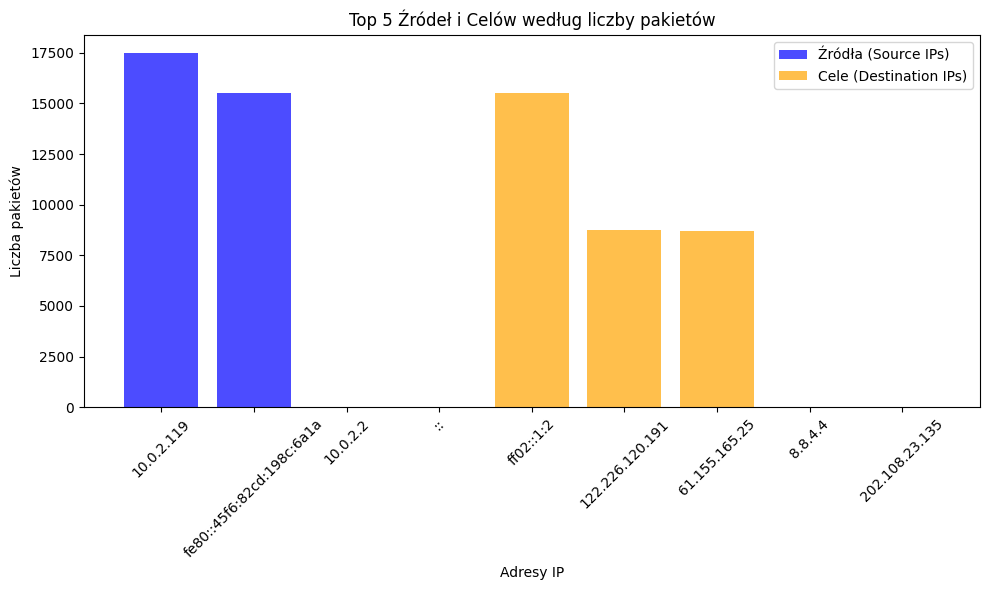

In [ ]:
visualize_packets(summ)

In [ ]:
def detect_sigma_rule(df):
    with open('sigma_rule.yml', 'r') as file:
        sigma_rule = yaml.safe_load(file)

    print(sigma_rule)


    selection = sigma_rule['detection']['selection']
    dst_ips = selection['dst_ip']
    bytes_sent_gte = selection['bytes_sent|gte']
    destination_port = selection['destination_port']

    detected_flows = df[
        (df['destination_port'] == destination_port) &
        (df['total_bytes'] >= bytes_sent_gte) &
        (df['destination_ip'].isin(dst_ips))
    ]

    print("Detected Flows:")
    print(detected_flows)

In [ ]:
detect_sigma_rule(df)

{'title': 'Large Data Transfer on Port 80', 'id': 12345, 'logsource': {'product': 'network', 'service': 'netflow'}, 'detection': {'selection': {'destination_port': 80, 'bytes_sent|gte': 1000000, 'dst_ip': ['122.226.120.191', '61.155.165.25']}, 'condition': 'selection'}, 'fields': ['source_ip', 'destination_ip', 'total_bytes', 'total_packets']}
Detected Flows:
     source_ip   destination_ip  source_port  destination_port  protocol  \
22  10.0.2.119  122.226.120.191        49159                80         6   
32  10.0.2.119    61.155.165.25        49161                80         6   

    src_to_dst_bytes  dst_to_src_bytes  total_bytes  src_to_dst_packets  \
22            108634           8243126      8351760                2010   
32            128199           9334621      9462820                2371   

    dst_to_src_packets  total_packets  
22                6751           8761  
32                6336           8707  


In [ ]:
from detection_rules import detect_large_flow, detect_suspicious_port, detect_long_duration

In [ ]:
rules = [detect_large_flow, detect_suspicious_port, detect_long_duration]

In [ ]:
for flow in mal_stream:
    for rule in rules:
        result, message = rule(flow)
        if result:
            print(f"ALERT: {message} (SRC: {flow.src_ip}, DST: {flow.dst_ip})")

ALERT: Long duration flow detected: 63021 ms (SRC: fe80::45f6:82cd:198c:6a1a, DST: ff02::1:2)
ALERT: Long duration flow detected: 63019 ms (SRC: fe80::45f6:82cd:198c:6a1a, DST: ff02::1:2)
ALERT: Long duration flow detected: 63017 ms (SRC: fe80::45f6:82cd:198c:6a1a, DST: ff02::1:2)
ALERT: Long duration flow detected: 63018 ms (SRC: fe80::45f6:82cd:198c:6a1a, DST: ff02::1:2)
ALERT: Long duration flow detected: 63017 ms (SRC: fe80::45f6:82cd:198c:6a1a, DST: ff02::1:2)
ALERT: Long duration flow detected: 63048 ms (SRC: fe80::45f6:82cd:198c:6a1a, DST: ff02::1:2)
ALERT: Long duration flow detected: 63019 ms (SRC: fe80::45f6:82cd:198c:6a1a, DST: ff02::1:2)
ALERT: Large flow detected: 8351760 bytes (SRC: 10.0.2.119, DST: 122.226.120.191)
ALERT: Long duration flow detected: 833414 ms (SRC: 10.0.2.119, DST: 122.226.120.191)
ALERT: Long duration flow detected: 63018 ms (SRC: fe80::45f6:82cd:198c:6a1a, DST: ff02::1:2)
ALERT: Long duration flow detected: 63200 ms (SRC: fe80::45f6:82cd:198c:6a1a, DS

# Sekcja z machine Learningiem

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### Pobranie ruchu

In [ ]:
!wget -O mal_traffic_lab2.pcap https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-10/2013-08-20_capture-win9.pcap
!wget -O normal_traffic_lab2.pcap https://mcfp.felk.cvut.cz/publicDatasets/CTU-Normal-20/2017-04-30_win-normal.pcap

--2024-12-21 14:42:07--  https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-10/2013-08-20_capture-win9.pcap
Resolving mcfp.felk.cvut.cz (mcfp.felk.cvut.cz)... 147.32.82.194
Connecting to mcfp.felk.cvut.cz (mcfp.felk.cvut.cz)|147.32.82.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 372506395 (355M) [application/vnd.tcpdump.pcap]
Saving to: ‘mal_traffic_lab2.pcap’

mal_traffic_lab2.pc 100%[===================>] 355.25M  12.8MB/s    in 29s     

2024-12-21 14:42:36 (12.4 MB/s) - ‘mal_traffic_lab2.pcap’ saved [372506395/372506395]

--2024-12-21 14:42:36--  https://mcfp.felk.cvut.cz/publicDatasets/CTU-Normal-20/2017-04-30_win-normal.pcap
Resolving mcfp.felk.cvut.cz (mcfp.felk.cvut.cz)... 147.32.82.194
Connecting to mcfp.felk.cvut.cz (mcfp.felk.cvut.cz)|147.32.82.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282415864 (269M) [application/vnd.tcpdump.pcap]
Saving to: ‘normal_traffic_lab2.pcap’

normal_traffic_lab2

## Funkcja wyciągająca dane z ruchu na podstawie, których algorytm będzie oceniał czy ruch jest normalny, czy złośliwy. Funkcja oznakowuje również ruch - 0 normalny 1 - złośliwy

In [ ]:
def extract_features_with_nfstream(pcap_file, label):
    streamer = NFStreamer(source=pcap_file).to_pandas()

    # Wybieramy istotne cechy
    features = streamer[[
        'src_port', 'dst_port', 'protocol', 'bidirectional_duration_ms',
        'bidirectional_packets', 'bidirectional_bytes'
    ]].copy()

    # Dodajemy przykładowe etykiety (w Twoim przypadku może to być osobny plik z etykietami)
    features['label'] = label  # 0: normalny, 1: anomalny
    return features

In [ ]:
# Ekstrakcja cech dla normalnego i złośliwego ruchu
normal_data = extract_features_with_nfstream("normal_traffic_lab2.pcap", label=0)  # 0: normalny ruch
malicious_data = extract_features_with_nfstream("mal_traffic_lab2.pcap", label=1)  # 1: złośliwy ruch

/usr/local/lib/python3.10/dist-packages/nfstream/streamer.py:547: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(temp_file_path)


In [ ]:
data = pd.concat([normal_data, malicious_data], ignore_index=True)
print("Rozmiar zbioru danych:", data.shape)
print(data.head())

Rozmiar zbioru danych: (298031, 7)
   src_port  dst_port  protocol  bidirectional_duration_ms  \
0         0         0        58                          0   
1         0         0        58                       8015   
2         0         0        58                        499   
3        68        67        17                       5014   
4        67        68        17                       8280   

   bidirectional_packets  bidirectional_bytes  label  
0                      1                   78      0  
1                      3                  210      0  
2                      2                  180      0  
3                      3                 1034      0  
4                      4                 2360      0  


## Podzielenie danych na zbiór trenujący i zbiór testowy

In [ ]:
# 2. Przygotowanie danych
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Trenowanie algorytmu

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Ocena jakości algorytmu

In [ ]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

### Wyznaczenie precyzji, odzysku i klasyfikacji F1

In [ ]:
# Raport wyników
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))
accuracy = clf.score(X_test, y_test)
print("Dokładność modelu: {:.2f}%".format(accuracy * 100))

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5596
           1       1.00      1.00      1.00     83814

    accuracy                           1.00     89410
   macro avg       0.99      0.99      0.99     89410
weighted avg       1.00      1.00      1.00     89410

Dokładność modelu: 99.82%


### Funkcja wizualizująca macierz konfuzji

In [ ]:
# Wizualizacja macierzy konfuzji
cm = confusion_matrix(y_test, y_pred)

# Funkcja do rysowania macierzy konfuzji
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Macierz Konfuzji')
    plt.colorbar()

    # Dodanie osi z nazwami klas
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Dodanie liczb w macierzy
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


Macierz konfuzji

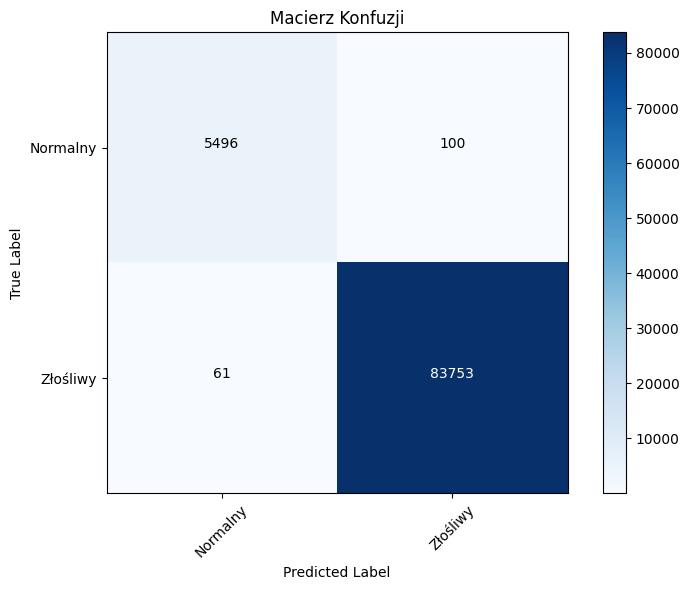

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Normalny', 'Złośliwy'])

### Krzywa ROC

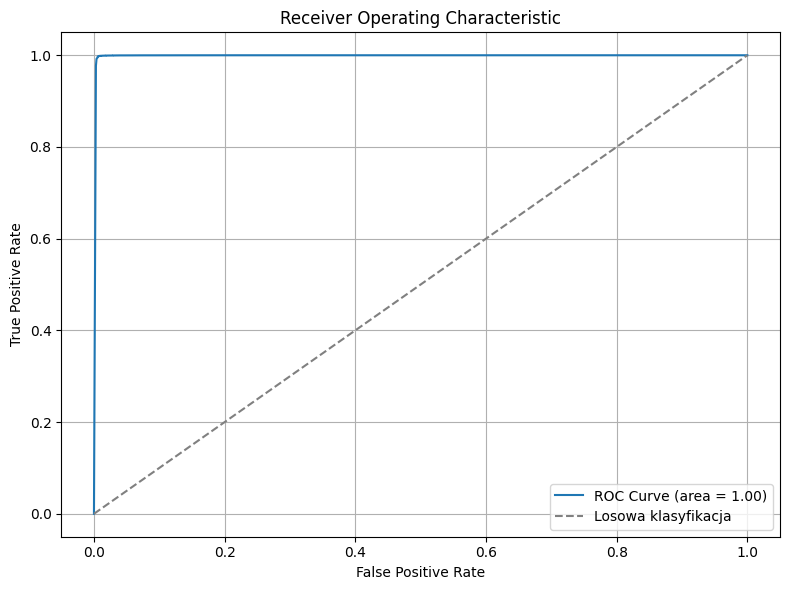

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Losowa klasyfikacja')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Tuning modelu

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)
print("Najlepsze parametry:", grid_search.best_params_)

Najlepsze parametry: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


### Utworzenie lepszego modelu

In [ ]:

# Tworzenie modelu z najlepszymi parametrami
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)

# Trenowanie modelu na danych treningowych
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

### Ocena dokładności

In [ ]:
y_pred = best_rf.predict(X_test)

# Obliczenie dokładności
accuracy = best_rf.score(X_test, y_test)
print("Dokładność modelu: {:.2f}%".format(accuracy * 100))

Dokładność modelu: 99.82%


### Raport klasyfikujący

In [ ]:
# Wyświetlenie raportu klasyfikacyjnego
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5596
           1       1.00      1.00      1.00     83814

    accuracy                           1.00     89410
   macro avg       0.99      0.99      0.99     89410
weighted avg       1.00      1.00      1.00     89410



### Macierz konfuzji

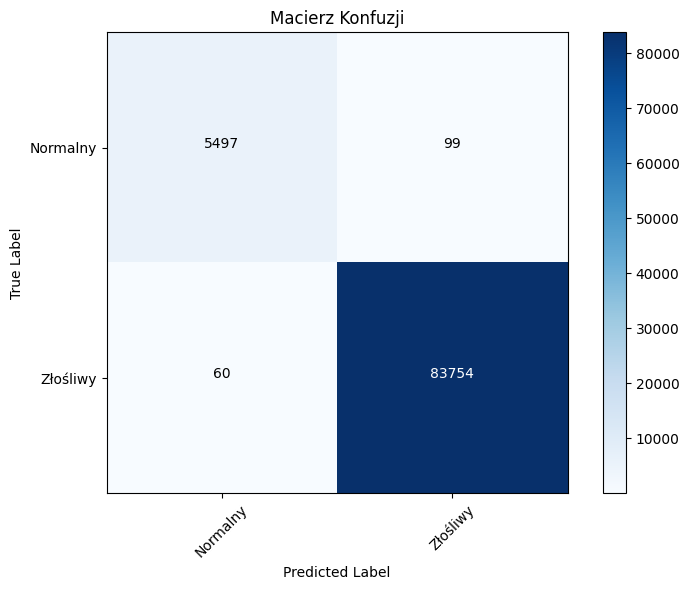

In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm2, class_names=['Normalny', 'Złośliwy'])

### Krzywa ROC

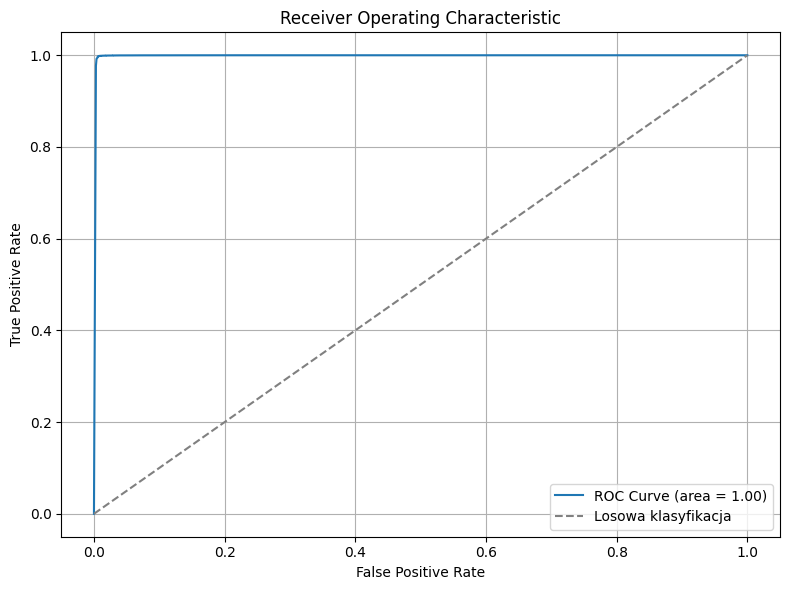

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Losowa klasyfikacja')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()